In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import torchxrayvision as xrv
from sklearn.model_selection import train_test_split

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
data_dir= "archive/chest_xray_resized/"



data_transforms = {
            'train': transforms.Compose([
                transforms.RandomAffine(15, 
                                        translate=(0.05, 0.05), 
                                        scale=(1.0-0.1, 1.0+0.1)),
                transforms.Resize(224),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
                ]), 
            'test': transforms.Compose([
                transforms.Resize(224),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
                ]),   
            }
    # Load the datasets with ImageFolder
datasets_train_val = datasets.ImageFolder(data_dir+"train/" ,data_transforms['train'])
data_sets={
            'test': datasets.ImageFolder(data_dir+"test/", data_transforms['test'])
            }
data_sets['train'], data_sets['valid'] = train_test_split(datasets_train_val, test_size=0.3, random_state=1)


    # Using the image datasets and the trainforms, define the dataloaders
data_loaders={
            'train': torch.utils.data.DataLoader(data_sets['train'], batch_size=16,shuffle=True),
            'test': torch.utils.data.DataLoader(data_sets['test'], batch_size=16,shuffle=True),
            'valid': torch.utils.data.DataLoader(data_sets['valid'], batch_size=16,shuffle=True)
            }

d:\machineLearning\miniconda\envs\pytorch-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
checkpoint = torch.load('results/test_checkpoint', map_location=lambda storage, loc: storage)
model = checkpoint['model']

In [3]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [4]:
import test_utils
test_utils.test_model(model, data_loaders)

y_true [1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0
 1 1 1 1 0 1 1 1 1

(0.8653846153846154, 0.9016393442622952, 0.9407078676309445)

In [7]:
data_sets

{'test': Dataset ImageFolder
     Number of datapoints: 624
     Root location: archive/chest_xray_resized/test/
     StandardTransform
 Transform: Compose(
                Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485 0.456 0.406], std=[0.229 0.224 0.225])
            ),
 'train': [(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -0.7993, -0.8678, -0.9534],
            [-2.1179, -2.1179, -2.1179,  ..., -0.7822, -0.8335, -0.9192],
            [-2.1179, -2.1179, -2.1179,  ..., -0.7650, -0.8335, -0.8849],
            ...,
            [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
            [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
            [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
   
           [[-2.0357, -2.0357, -2.0357,  ..., -0.6877, -0.7577, -0.8452],
            [-2.0357, -2.0357, -2.0357,  ..

img_size = torch.Size([3, 224, 224])
label = 1


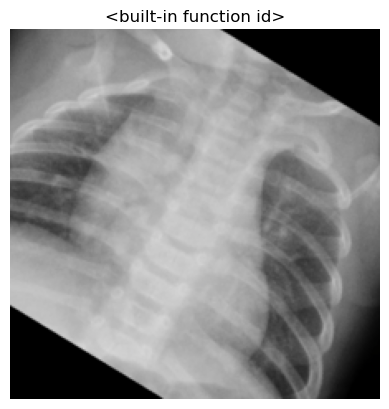

In [2]:
img, labels=data_sets['train'][2]
print('img_size =', img.size())
print('label =',labels)
cxr=img.numpy().squeeze().transpose(1,2,0)    
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
cxr = std * cxr + mean
cxr = np.clip(cxr, 0, 1)
# Display the image
plt.imshow(cxr)
plt.axis('off')
plt.title(id)
plt.show()

img_size = torch.Size([3, 224, 224])
label = 0


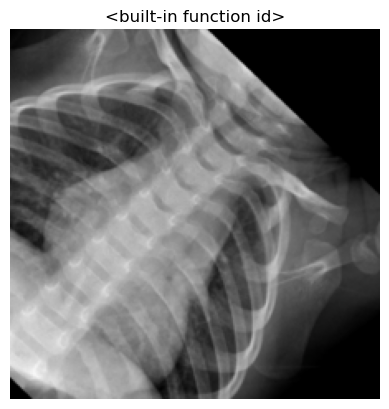

In [39]:
img, labels=train_dataset[1]
print('img_size =', img.size())
print('label =',labels)
cxr=img.numpy().squeeze().transpose(1,2,0)    
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
cxr = std * cxr + mean
cxr = np.clip(cxr, 0, 1)
# Display the image
plt.imshow(cxr)
plt.axis('off')
plt.title(id)
plt.show()

img_size = torch.Size([3, 512, 512])
label = 0
img_id = <built-in function id>


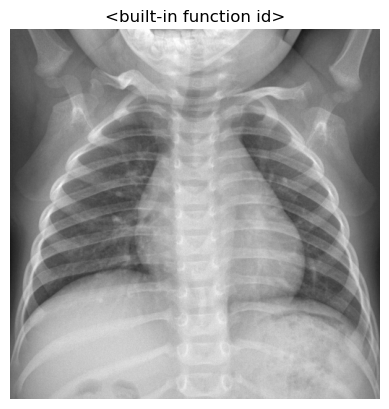

In [12]:
img, labels=train_dataset[2]
print('img_size =', img.size())
print('label =',labels)

print('img_id =', id)
cxr=img.numpy().squeeze().transpose(1,2,0)    
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
cxr = std * cxr + mean
cxr = np.clip(cxr, 0, 1)
# Display the image
plt.imshow(cxr)
plt.axis('off')
plt.title(id)
plt.show()

In [5]:
inputs, labels =train_dataset[2]

In [7]:
labels

0

In [6]:
inputs

tensor([[[0.0078, 0.0902, 0.1765,  ..., 0.2118, 0.1529, 0.0431],
         [0.0000, 0.0549, 0.1490,  ..., 0.1922, 0.1255, 0.0235],
         [0.0000, 0.0275, 0.1176,  ..., 0.1725, 0.0941, 0.0078],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0078, 0.0902, 0.1765,  ..., 0.2118, 0.1529, 0.0431],
         [0.0000, 0.0549, 0.1490,  ..., 0.1922, 0.1255, 0.0235],
         [0.0000, 0.0275, 0.1176,  ..., 0.1725, 0.0941, 0.0078],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0078, 0.0902, 0.1765,  ..., 0.2118, 0.1529, 0.0431],
         [0.0000, 0.0549, 0.1490,  ..., 0.1922, 0.1255, 0.0235],
         [0.0000, 0.0275, 0.1176,  ..., 0.1725, 0.0941, 0.

In [ ]:
inputs, labels, filename =train_dataset[2]
print('img_size =', inputs.size())
print('label =')
for i in range(len(labels)):
    if labels[i] == 1:
        print('     ',labels[i])
print('img_id =', id)
cxr=inputs.numpy().squeeze().transpose(1,2,0)    
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
cxr = std * cxr + mean
cxr = np.clip(cxr, 0, 1)
# Display the image
plt.imshow(cxr)
plt.axis('off')
plt.title(id)
plt.show()